# Cool Data Presentation - Rock Paper Scissors Dataset
## Presenter: Haochen (Harry) Li
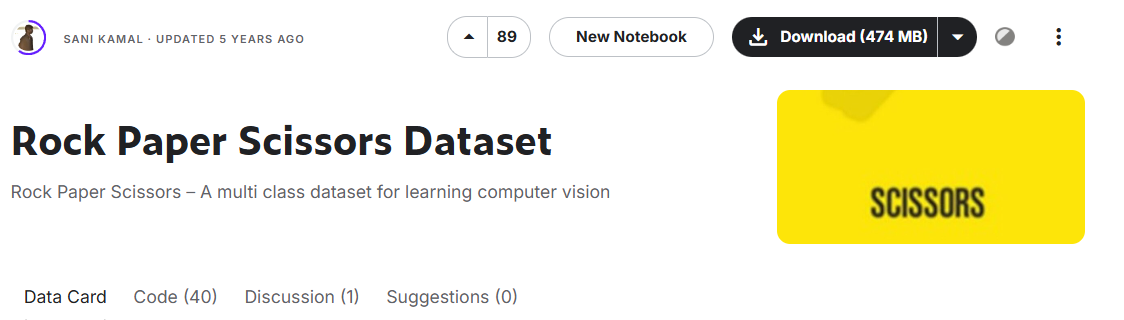

## 1. Dataset Overview
### 1.1 Dataset Curator
Laurence Moroney (lmoroney@gmail.com / laurencemoroney.com)

### 1.2 Dataset Link
Kaggle: https://www.kaggle.com/datasets/sanikamal/rock-paper-scissors-dataset/data <br>
Original source: http://www.laurencemoroney.com/rock-paper-scissors-dataset/ <br>
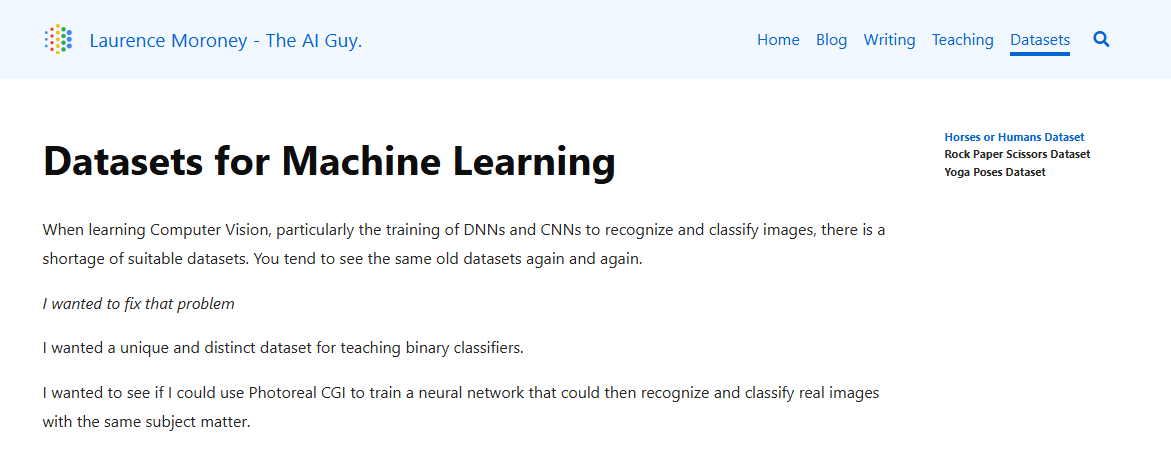

### 1.3 License
(Copied from Kaggle dataset webpage)
The dataset is licensed as a <a href = "https://creativecommons.org/licenses/by/2.0/">CC By 2.0</a>, free for you to <b>share and adapt</b> for all uses, commercial or non-commercial. Please just <b>attribute</b> and give appropriate credit to Laurence Moroney (lmoroney@gmail.com / laurencemoroney.com), and place no additional restrictions on your users as outlined here.

## 2. Previous Data Analysis


### Example: Image classifier <a href="https://www.kaggle.com/code/mexwell/rock-paper-scissors-pytorch-classifier"> Rock Paper Scissors PyTorch Classifier </a>

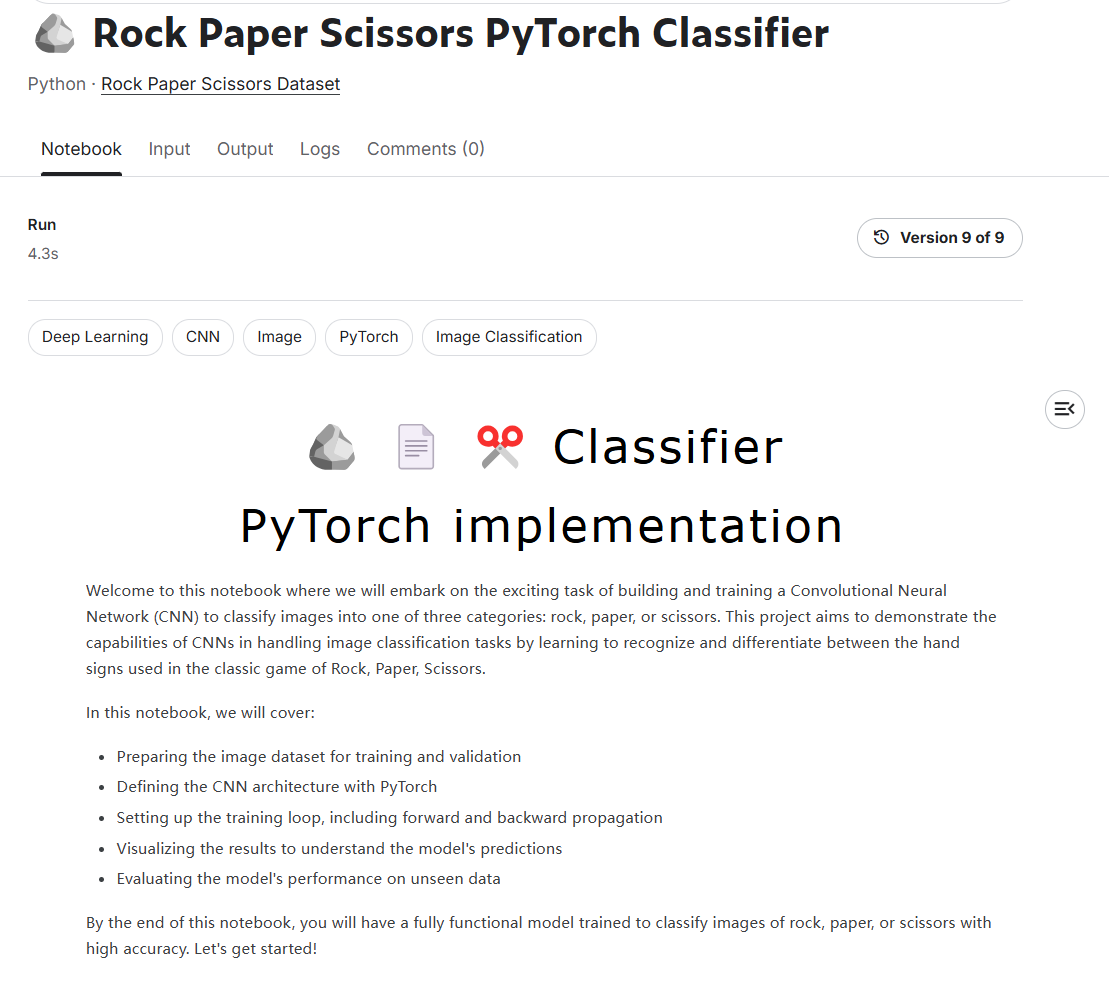

Sample code below copied from the notebook.


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.conv4 = nn.Conv2d(128, 256, 5)
        
        self.fc1 = nn.Linear(256, 50)
        
        self.pool = nn.MaxPool2d(2, 2)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        bs, _, _, _ = x.shape
        x = F.adaptive_avg_pool2d(x, 1).reshape(bs, -1)
        x = self.fc1(x)
        return x

Model training and validation result:
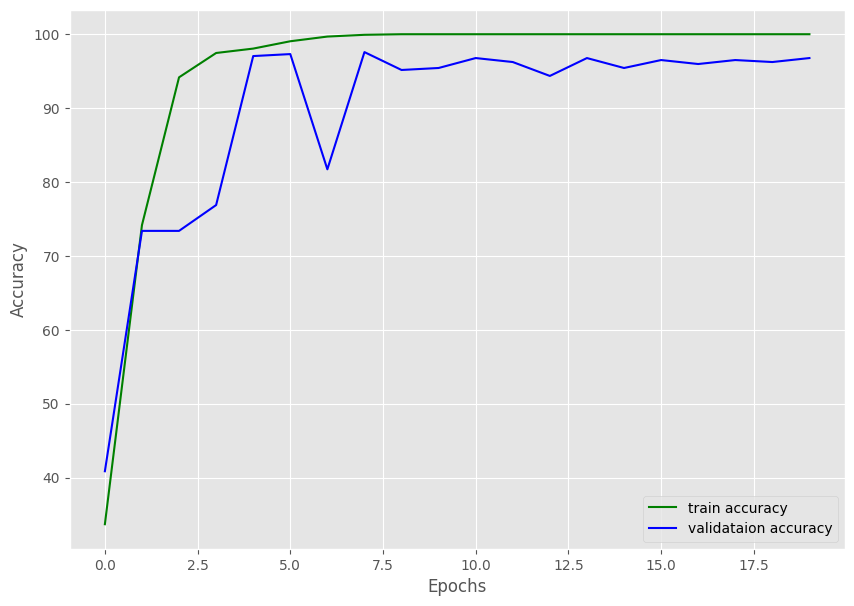
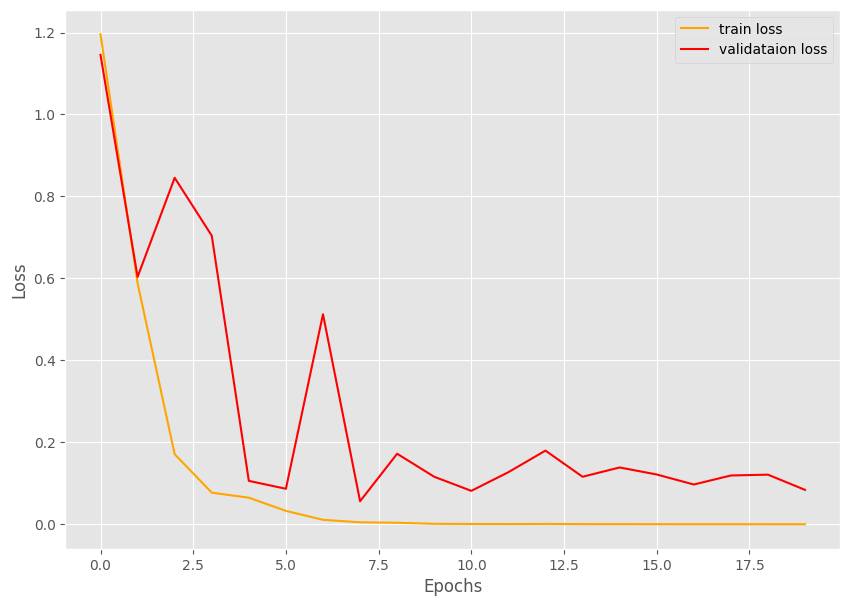

Overfitting quickly, may need training data augumentation.

Validation set result:
| Class     | Precision | Recall | F1-Score | Support |
|-----------|-----------|--------|----------|---------|
| Paper     | 1.00      | 0.82   | 0.90     | 11      |
| Rock      | 1.00      | 0.91   | 0.95     | 11      |
| Scissors  | 0.79      | 1.00   | 0.88     | 11      |
| **Accuracy** |        |        |**0.91** | **33**  |

Confusion matrix:

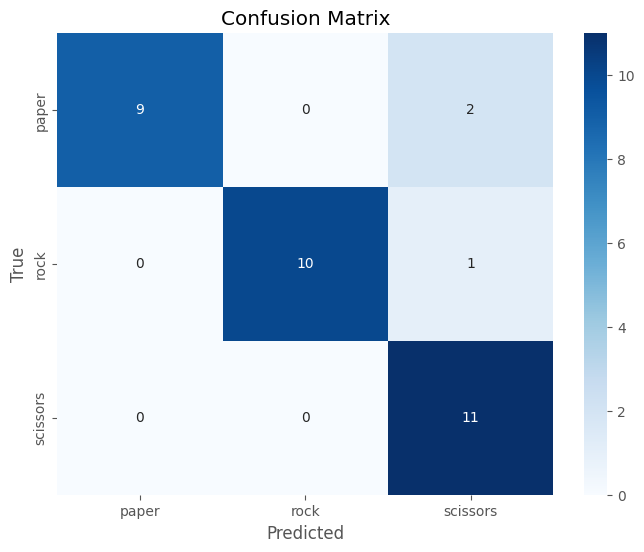

Validation prediction result using validation data:

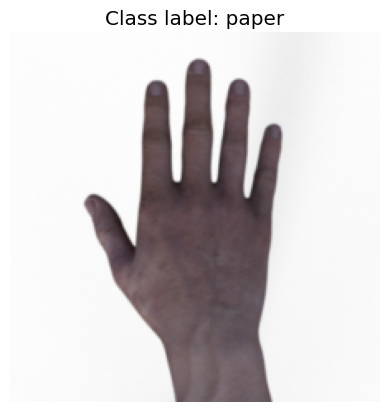

## 3. Demo

### 3.1 Data Structure

In [3]:
import os
from collections import defaultdict

def print_structure(root_dir):
    '''
        The function search through each sub-directory and print out the structure of the dataset
    '''
    for root, dirs, files in os.walk(root_dir):
        if any(file.endswith('.png') for file in files):
            print(root)
            file_types = count_file_types(root)
            for file_type, count in file_types.items():
                print(f'{file_type}: {count}')
            print("-"*20)
def count_file_types(directory):
    '''
        This function will return the data type and count in a given directory. 
        Impletemented with the help of copilot.
    '''
    file_types_count = defaultdict(int)
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_extension = os.path.splitext(file)[1]
            file_types_count[file_extension] += 1
    return file_types_count

# Print the directory structure
print_structure('Rock-Paper-Scissors')

Rock-Paper-Scissors/train/rock
.png: 840
--------------------
Rock-Paper-Scissors/train/scissors
.png: 840
--------------------
Rock-Paper-Scissors/train/paper
.png: 840
--------------------
Rock-Paper-Scissors/test/rock
.png: 124
--------------------
Rock-Paper-Scissors/test/scissors
.png: 124
--------------------
Rock-Paper-Scissors/test/paper
.png: 124
--------------------
Rock-Paper-Scissors/validation
.png: 33
--------------------


### 3.2 Data Point Information

Image Path: Rock-Paper-Scissors/train/rock/rock01-000.png
Image Size: 300x300
File Size: 64286 bytes


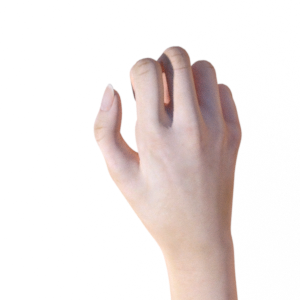

Image Path: Rock-Paper-Scissors/train/paper/paper01-000.png
Image Size: 300x300
File Size: 74307 bytes


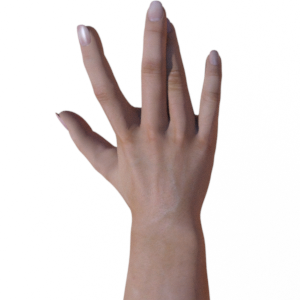

Image Path: Rock-Paper-Scissors/train/scissors/scissors01-000.png
Image Size: 300x300
File Size: 75941 bytes


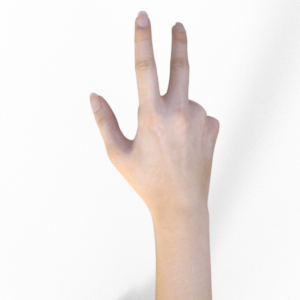

Image Path: Rock-Paper-Scissors/test/rock/testrock01-00.png
Image Size: 300x300
File Size: 88537 bytes


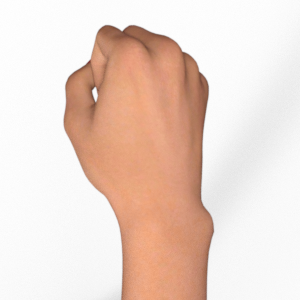

Image Path: Rock-Paper-Scissors/test/paper/testpaper01-00.png
Image Size: 300x300
File Size: 85434 bytes


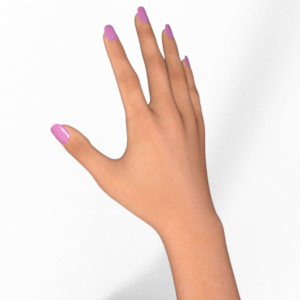

Image Path: Rock-Paper-Scissors/test/scissors/testscissors01-00.png
Image Size: 300x300
File Size: 89166 bytes


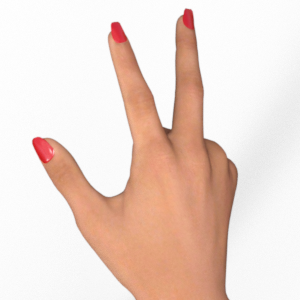

In [7]:
from PIL import Image

# select the 3 samples from training set
train_paths = []
train_paths.append(os.path.join("Rock-Paper-Scissors","train","rock","rock01-000.png"))
train_paths.append(os.path.join("Rock-Paper-Scissors","train","paper","paper01-000.png"))
train_paths.append(os.path.join("Rock-Paper-Scissors","train","scissors","scissors01-000.png"))
train_paths.append(os.path.join("Rock-Paper-Scissors","test","rock","testrock01-00.png"))
train_paths.append(os.path.join("Rock-Paper-Scissors","test","paper","testpaper01-00.png"))
train_paths.append(os.path.join("Rock-Paper-Scissors","test","scissors","testscissors01-00.png"))


# function to display the image
def show_image_and_info(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Get image information
        width, height = img.size
        file_size = os.path.getsize(image_path)
        
        # Print image information
        print(f'Image Path: {image_path}')
        print(f'Image Size: {width}x{height}')
        print(f'File Size: {file_size} bytes')
        # Display the image
        img.show()
# print data
for path in train_paths:
    show_image_and_info(path)

Data series inside training set and how are they generated.

<Figure size 640x480 with 0 Axes>

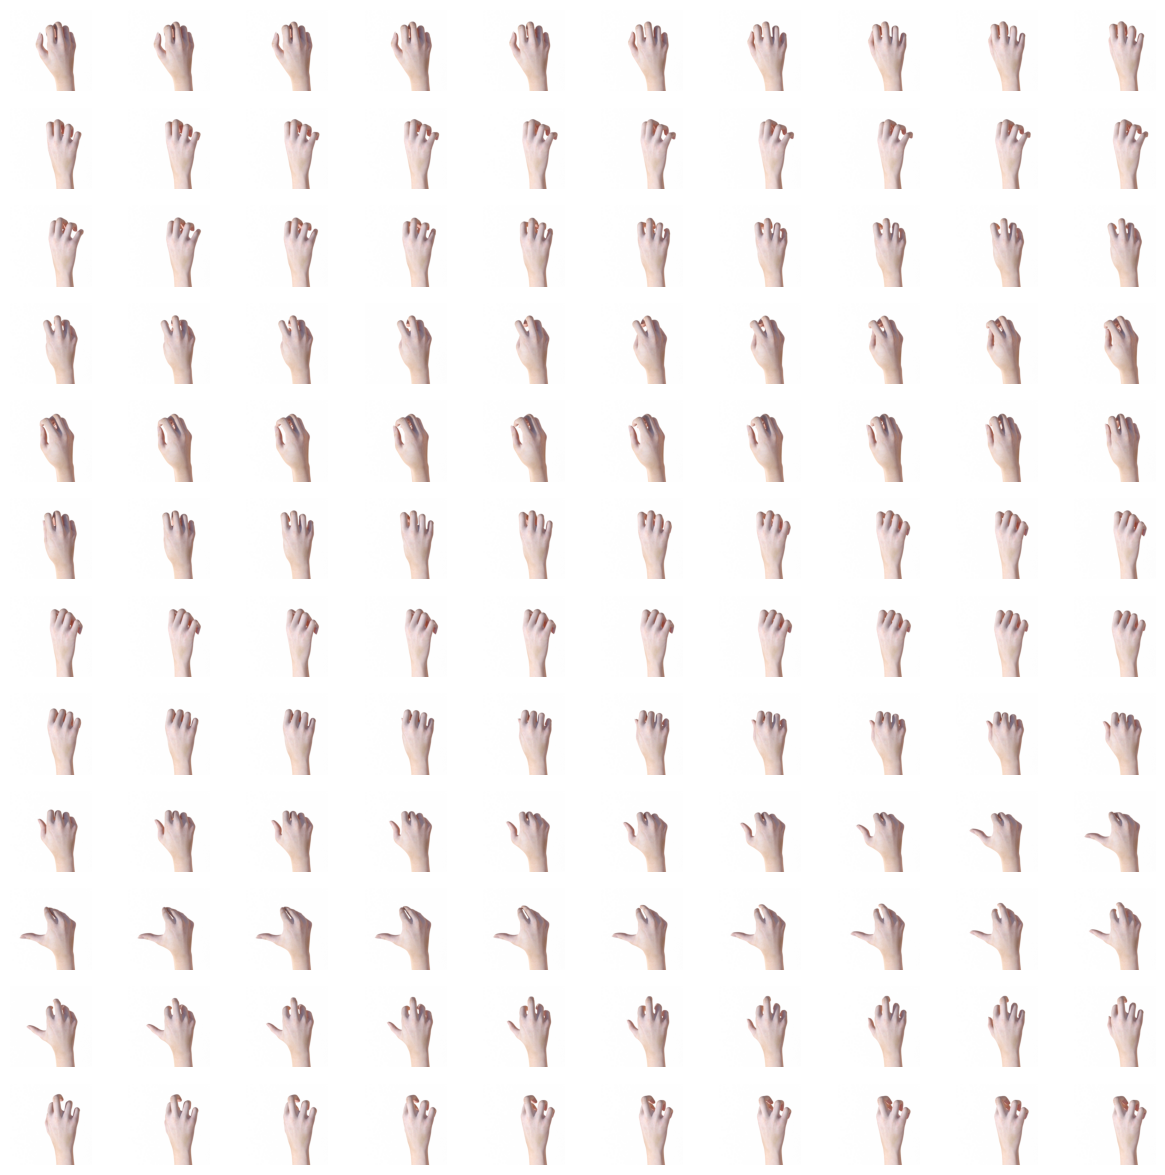

In [12]:
import matplotlib.pyplot as plt

sample_num = 120
image_paths = [os.path.join("Rock-Paper-Scissors","train","rock","rock01-"+str(i).zfill(3)+".png") for i in range(sample_num)]

def load_images(image_paths):
    images = []
    for path in image_paths:
        img = Image.open(path)
        images.append(img)
    return images

def plot_image_matrix(images, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    axes = axes.flatten()
    
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
    
plt.tight_layout()
plt.show()

images = load_images(image_paths)
plot_image_matrix(images, rows=12, cols=10)